# Football Data Analytics

ฟุตบอลเป็นกีฬาชนิดหนึ่งซึ่งได้รับความนิยมมากที่สุดในปัจจุบัน  ซึ่งปัจจัยสำคัญที่ส่งผลต่อการแข่งขันนั้นมีหลายประการ ไม่ว่าจะเป็นจำนวนการส่งบอลการสกัดการดวลกันหรือแม้แต่สถิติรับบอลหรือบอลที่เข้าประตู ทางกลุ่มของเราจึงได้เล็งเห็นถึงความสำคัญและความน่าสนใจของชุดข้อมูลจึงได้ทำการนำมาวิเคราะห์เชิงลึกเพื่อพิสูจน์ข้อเท็จจริงต่างๆจากชุดข้อมูลที่มี 

ข้อมูล ณ วันที่ 9 มีนาคม 2566

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

การเพิ่ม field ต่างๆจะทำให้การวิเคราะห์ง่ายขึ้น และสามารถใช้งานและวิเคราะห์ข้อมูลได้หลากหลายมากขึ้น                                                                         

- xG/90 [float]: จำนวนการทำเข้าประตูที่คาดว่าจะสามารถทำได้ ใน 90 นาที                                                                                                             

- (Gls-xG)/90 [float]: ความแตกต่างระหว่างจำนวนการทำประตูที่ทำได้จริง กับ  จำนวนการทำเข้าประตูที่คาดว่าจะสามารถทำได้ ใน 90 นาที                               

- KP/90 [float]: จำนวน Key pass ที่สามารถทำได้ ใน 90 นาที                                                                                                                                                                                              

- Ast/90 [float]: จำนวน assist ที่สามารถทำได้ ใน 90 นาที                                                                                                                                                                                                      

- xA/90 [float]: จำนวน assist ที่คาดว่าจะสามารถทำได้ ใน 90 นาที    

In [4]:
gk = pd.read_csv('goalkeepers.csv')
df = pd.read_csv('players_22-23.csv') # ข้อมูลฤดูกาล 2022-2023
df['(Gls-xG)/90'] = df['Gls/90'] - df['xG/90']
df['KP/90'] = round(df['KP'] / df['90s'], 2)
df['xA/90'] = round(df['xA'] / df['90s'], 3)

- ในการวิเคราห์ประเด็นนี้ จะใช้ dataframe ในฤดูกาล 2022 ถึง 2023 ใน Premier League เท่านั้น                                                                                                                               df_prem_mf จะเป็น dataframe ที่เราจะคัดมาเฉพาะแต่ตำแหน่ง กองกลาง (Midfielder)
df_prem_fw จะเป็น dataframe ที่เราจะคัดมาเฉพาะแต่ตำแหน่ง กองหน้า (Forward or Striker)
df_prem_fw_big5 จะเป็น dataframe ที่เราจะคัดมาเฉพาะแต่ตำแหน่ง กองหน้า (Forward or Striker) ที่อยู่ในทีม top 5 ของ English Premier League ในฤดูกาล 2022-2023 ได้แก่ Arsenal, Manchester City, Manchester United, Tottenham และ Liverpool

In [5]:
df_prem = df[df.Comp.str.contains('Premier League')] #Prem only
df_prem_mf = df_prem[(df_prem.Pos.str.startswith('MF') & (df_prem.Starts > 10) )] #Filter Midfield and Playtime
df_prem_fw = df_prem[(df_prem.Pos.str.startswith('FW') 
                                  & (df_prem.Min > 450) & (df_prem.Gls > 2))] #Filter Forward

In [6]:
df_prem_fw_big5 = df_prem_fw[df_prem_fw.Team.isin(['Arsenal', 'Manchester City', 'Manchester Utd', 'Tottenham', 'Liverpool'])]

## อะไรที่ทำให้ Haaland เป็นนักเตะที่ทำประตูได้สูงที่สุดใน Premier League

- top_5 คือ ทีมที่ทำการแข่งขันใน English Premier League ในฤดูกาล 2022-2023 แล้วมีฟอร์มการเล่นของทีมที่โดดเด่นที่สุด                                             ได้แก่ Arsenal, Manchester City, Manchester United, Tottenham และ Liverpool

In [7]:
top_5 = ['Arsenal', 'Manchester City', 'Manchester Utd', 'Tottenham', 'Liverpool']

ข้างล่างนี้คือข้อมูลภาพรวมค่า stats ต่างๆ ของตำแหน่ง กองหน้า (forward) แต่ละคนจาก df_prem_fw_big5 โดยเรียงลำดับจากการทำประตู Gls จากมากไปน้อย

### ภาพรวมการทำประตูของนักเตะใน EPL

จากการสังเกตตาราง pivot table จะสังเกตได้ว่า Erling Haaland นักเตะกองหน้าจากทีม Manchester City ได้ทำประตูไป 27 ประตู ซึ่งมากที่สุดใน English Premier League ฤดูกาล 2022-2023 

In [8]:
df_prem_fw_big5.pivot_table(index=['Name', 'Team', 'Pos'], values=['xG', 'Gls', 'Age', 'MP', 'Starts', 'G/Sh', 'SoT']).sort_values(by='Gls', ascending=False)

,,,Age,G/Sh,Gls,MP,SoT,Starts,xG
Name,Team,Pos,,,,,,,
Erling Haaland,Manchester City,FW,22,0.28,27,25,39,24,18.9
Harry Kane,Tottenham,FW,29,0.18,18,26,37,26,13.8
Marcus Rashford,Manchester Utd,FW,25,0.21,14,25,31,23,10.3
Mohamed Salah,Liverpool,FW,30,0.14,11,25,32,25,11.8
Martinelli,Arsenal,FW,21,0.18,11,26,22,25,6.7
Bukayo Saka,Arsenal,FW,21,0.13,10,26,19,26,8.7
Phil Foden,Manchester City,FW,22,0.26,9,23,18,16,4.6
Roberto Firmino,Liverpool,FWMF,31,0.24,8,18,21,11,4.5
Darwin Núñez,Liverpool,FW,23,0.11,8,19,30,15,10.3


### Manchester City ทำประตูได้มากที่สุดใน EPL เช่นกัน

เมื่อเปรียบเทียบผลรวมจำนวนการทำประตูของแต่ละทีมแล้ว ค้นพบว่า Manchester City นั้นทำประตูมากที่สุดใน English Premier League ฤดูกาล 2022-2023  เช่นกัน

In [9]:
df_prem.groupby(by='Team').Gls.sum().sort_values(ascending=False).head(10)

Team
Manchester City    64
Arsenal            56
Tottenham          44
Liverpool          43
Brentford          39
Brighton           39
Manchester Utd     39
Fulham             35
Newcastle Utd      34
Leicester City     34
Name: Gls, dtype: int64

### Erling Haaland ทำประตูไปถึง 42% จากการทำประตูของทั้งทีม

df_mci คือ dataframe ที่คัดเลือกมาเฉพาะ ผู้เล่นจากทีม Manchester City ใน EPL ฤดูกาล 2022-2033
df_mci_fw คือ df_mci ที่คัดเลือกมาเฉพาะนักเตะในตำแหน่ง กองหน้า (forward)

In [10]:
df_mci = df_prem[df_prem.Team == 'Manchester City'] #filter MCI
df_mci_fw = df_mci[df_mci.Pos.str.startswith('FW')] #filter forward

แสดงผลการทำประตูของ ทีม Manchester City ผ่านทาง pie chart, สังเกตได้ว่า Erling Haaland ทำประตูไปถึง 42% จากการทำประตูของทั้งทีม ซึ่งถือว่าเกือบครึ่งของการทำประตูจากทีม Manchester City นั้นมาจากการทำประตูของ Haaland คนเดียว

Text(0.5, 1.0, 'Manchester City Goal Scorer')

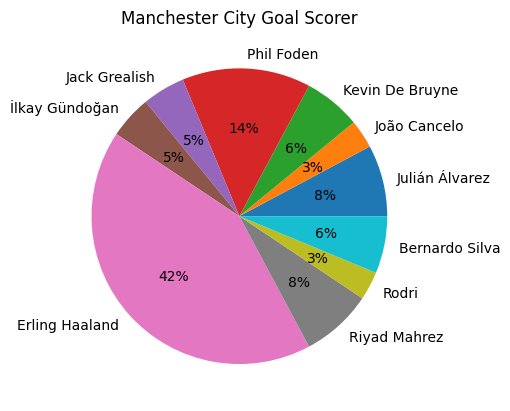

In [11]:
plt.pie(data=df_mci[df_mci.Gls > 0], x='Gls', labels='Name', autopct='%.0f%%')
plt.title("Manchester City Goal Scorer")

### Erling Haaland อยู่ใน top 5 ผู้ที่ทำประตูเยอะที่สุดใน EPL

top5_gls คือการคัดเลือก กองหน้าที่สามารถทำประตูได้มากที่สุด 5 คนจาก EPL ในฤดูกาล 2022-2023 โดยเลียงลำดับตามจำนวนการทำประตู

In [12]:
top5_gls = df_prem_fw[(df_prem_fw.Starts > 10) 
                            & df_prem_fw.Team.isin(top_5)].sort_values(by='Gls', ascending=False).head(5)
top5_gls[['Name', 'Gls', 'xG', '90s', 'G/Sh']]

,Name,Gls,xG,90s,G/Sh
1081,Erling Haaland,27,18.9,22.5,0.28
1291,Harry Kane,18,13.8,25.8,0.18
2095,Marcus Rashford,14,10.3,22.6,0.21
1608,Martinelli,11,6.7,23.3,0.18
2220,Mohamed Salah,11,11.8,24.7,0.14


เมื่อแสดงผล Coversion Rates หรือว่า อัตราการเปลี่ยนโอกาสยิงให้เป็นประตูของนักเตะ ท็อป 5 ของ EPL 
ยิ่ง Conversion Rates มาก แสดงว่า shot attempt (Sh) ที่นักเตะยิงประตูไป นั้นยิ่งมีโอกาสสูงที่จะเป็นการทำประตู Gls
ซึ่งถึงแม้ Harry Kane จะทำประตูมากกว่า Marcus Rashford แต่เมื่อ conversion rates น้อยกว่าแสดงว่าทุกครั้งที่ Rashford ยิงประตูจึงมีโอกาสที่จะทำประตูหรือยิงเข้าประตูได้มากกว่า Kane นั่นเอง

ที่สำคัญเลยจาก Bar Chart จะสังเกตุได้ว่า Haaland นั้นมี Conversion Rates ที่สูงที่สุดในกองหน้าที่สามารถทำประตูได้มากที่สุด 5 คนจาก EPL

Text(0, 0.5, '')

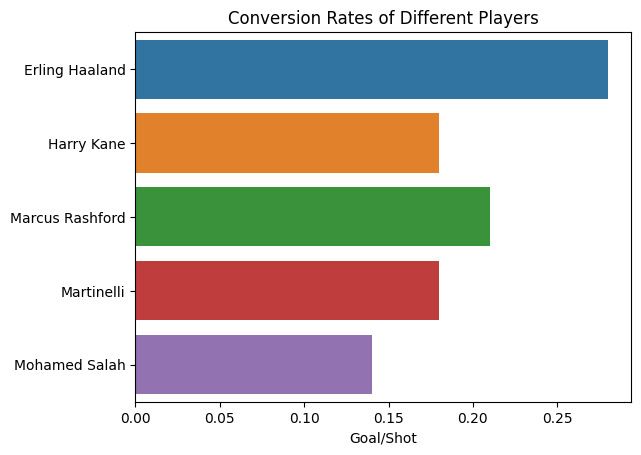

In [13]:
sns.barplot(y='Name', x='G/Sh', data=top5_gls)
plt.title('Conversion Rates of Different Players')
plt.xlabel("Goal/Shot")
plt.ylabel("")

### นักเตะสามารถทำประตูได้ตามที่คาดการหรือไม่

เป็นการเเสดงกราฟแบบจุดมีจุดประสงค์เพื่อให้เห็นการเปรียบเทียบว่า จากการที่ได้คัดเลือกนักเตะที่ทำประตูได้มากที่สุด 5 คน ทั้ง  5 คนมีจำนวนของการทำประตูได้เมื่อเปรียบเทียบกับ ผลคาดคะเนจำนวนการทำประตูก่อนการเเข่งว่ามีโอกาสในการทำประตูได้มากเท่าใด ซึ่งจากตารางจะเห็นว่า นักเตะส่วนมากจะสามารถทำประตูได้มากกว่าที่มีการคาดการเอาไว้ 

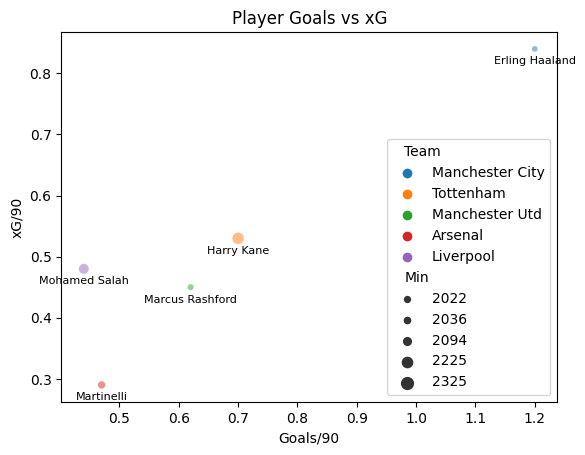

In [14]:
sns.scatterplot(x='Gls/90', y='xG/90', data=top5_gls, size='Min', hue='Team', alpha=0.5)
plt.title("Player Goals vs xG")
plt.xlabel("Goals/90")
for i, row in top5_gls.iterrows():
    plt.text(row['Gls/90'] , row['xG/90']-0.025, row['Name'], fontsize=8, ha='center')

 ในตารางนี้จะเเสดงให้เห็นการเปรียบเทียบว่า ผลการทำประตูในเวลา 90 นาทีของนักเตะทั้ง5คนเเละความต่างระหว่างการทำประตูจริงกับผลคาดคะเนนในการเเข่งขัน 90 นาทีนั้นเป็นอย่างไร ซึ่งเราได้ทำเป็นในรูปแบบของกราฟจะทำได้เห็นสิ่งที่น่าสนใจ คือ นักเตะส่วนมากมีการทำประตูที่มากกว่าที่คาดการเอาไว้ เช่นการที่ Eriling  Haaland มีความสามารถที่จะทำประตูกับลูกที่ไม่คาดคิดว่าจะเข้าได้

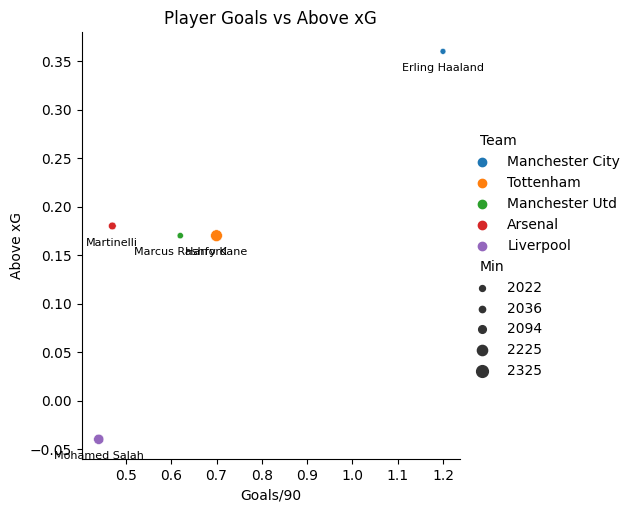

In [15]:
sns.relplot(data=top5_gls, x='Gls/90', y='(Gls-xG)/90', size='Min', hue='Team')
plt.title("Player Goals vs Above xG")
plt.ylabel("Above xG")
plt.xlabel("Goals/90")
for i, row in top5_gls.iterrows():
    plt.text(row['Gls/90'] , row['(Gls-xG)/90']-0.02, row['Name'], fontsize=8, ha='center')

### Key Pass with Shot creating action

In [16]:
df_prem_mf_top5 =  df_prem_mf[df_prem.Team.isin(top_5)]

/var/folders/hw/nfjszs0936lcb1b4lz7lwkkm0000gn/T/ipykernel_38753/2025171448.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_prem_mf_top5 =  df_prem_mf[df_prem.Team.isin(top_5)]


### โอกาสในการส่งบอลสำเร็จของทีมชั้นนำ

   ในการแข่งขันสิ่งที่สำคัญที่สุดคือการทำประตูซึ่งการทำประตูนั้น มีแนวโน้มสูงขึ้นเมื่อมีการส่งบอลเพื่อที่จะทำประตูได้สำเร็จ ผู้เล่นแต่ละในแต่ละทีมจะมีการส่งบอลกันไปมาในระหว่างผู้เล่นซึ่งโอกาสในการส่งบอลถ้าสำเร็จก็จะยิ่งเพิ่มโอกาสในการทำประตูในการแข่งขันมีจังหวะหนึ่งซึ่งเป็นโอกาสในการทำประตูแต่จำเป็นจะต้องส่งบอลไปทางผู้เล่นอีกคนหนึ่งที่มีโอกาสในการทำประตูมากที่สุด  ทำให้อัตราการส่งบอลที่เรียกกันว่า key passให้สำเร็จนั้นมีผลต่ออัตราการทำประตู  

Text(0.5, 9.444444444444438, 'Key Pass/90')

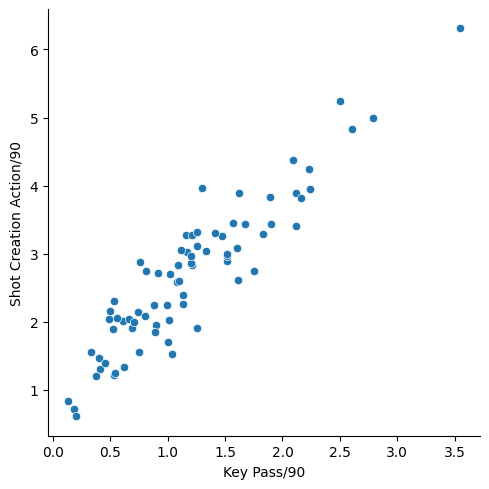

In [17]:
sns.relplot(data=df_prem_mf, x='KP/90', y='SCA/90')
plt.ylabel("Shot Creation Action/90")
plt.xlabel("Key Pass/90")
# Shot Creation Action : การสร้างสรรค์โอกาส

- ตารางนี้จะเป็นการเเสดงค่าต่างๆให้เห็นโดยรวม

In [18]:
creation_stat = df_prem_mf.groupby(by='Team')[['TotCmp%', 'SCA/90', 'KP/90']].mean().round(2)

# Rank the teams based on SCA/90 and KP/90
creation_stat['SCA/90 Rank'] = creation_stat['SCA/90'].rank(method='dense', ascending=False).astype(int)
creation_stat['KP/90 Rank'] = creation_stat['KP/90'].rank(method='dense', ascending=False).astype(int)
creation_stat['TotCmp% Rank'] = creation_stat['TotCmp%'].rank(method='dense', ascending=False).astype(int)

# Sort the data by SCA/90
creation_stat = creation_stat.sort_values(by='SCA/90', ascending=False)

creation_stat

,TotCmp%,SCA/90,KP/90,SCA/90 Rank,KP/90 Rank,TotCmp% Rank
Team,,,,,,
Manchester City,83.40,4.14,1.91,1,1,3
Arsenal,83.37,3.92,1.73,2,3,4
Manchester Utd,76.30,3.66,1.83,3,2,15
Tottenham,80.05,3.25,1.36,4,5,9
Liverpool,83.92,2.97,1.04,5,12,2
Brighton,84.18,2.96,1.56,6,4,1
Crystal Palace,76.55,2.74,1.34,7,6,14
West Ham,79.80,2.71,0.96,8,15,10
Newcastle Utd,81.00,2.60,1.00,9,14,7


### Expected assist and Actual assist

### โอกาสในการทำประตูจากลูกส่งของคนในทีม

- ในการแข่งขันสิ่งที่สำคัญที่สุดคือการทำประตูซึ่งการทำประตูนั้น มีแนวโน้มสูงขึ้นเมื่อมีการส่งบอลเพื่อที่จะทำประตูได้สำเร็จ ผู้เล่นแต่ละในแต่ละทีมจะมีการส่งบอลกันไปมาในระหว่างผู้เล่นซึ่งโอกาสในการส่งบอลถ้าสำเร็จก็จะยิ่งเพิ่มโอกาสในการทำประตูในการแข่งขันมีจังหวะหนึ่งซึ่งเป็นโอกาสในการทำประตูแต่จำเป็นจะต้องส่งบอลไปทางผู้เล่นอีกคนหนึ่งที่มีโอกาสในการทำประตูมากที่สุด  ทำให้อัตราการส่งบอลที่เรียกกันว่า key passให้สำเร็จนั้นมีผลต่ออัตราการทำประตู  

Text(0.5, 28.999999999999986, 'Assist/90')

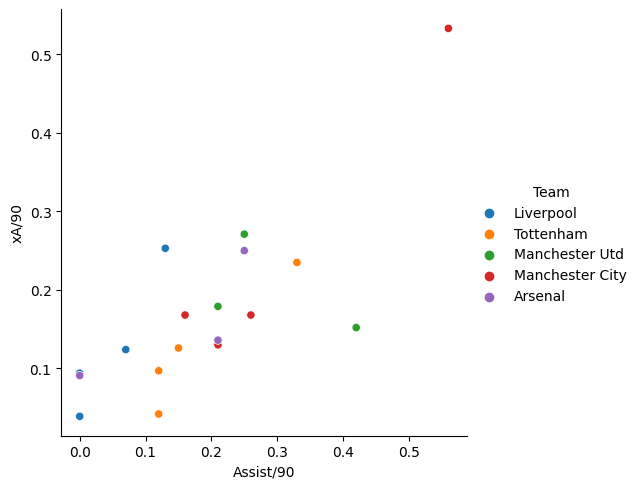

In [19]:
sns.relplot(data=df_prem_mf_top5, x='Ast/90', y='xA/90', hue='Team')
plt.ylabel("xA/90")
plt.xlabel("Assist/90")

## นักเตะคนใดในทีม Liverpool ที่สมควรได้รับเวลาในการเล่นเพิ่ม

### ข้อมูลเริ่มต้นที่ใช้ในการวิเคราะห์

ก่อนอื่นต้องมาดูภาพรวมผลงานของทีม Liverpool ทั้งฤดูกาล 2021-2022 และ ฤดูลกาล 2022-2023 โดย
table_21_22 คือ dataframe ผลงานของทีม Liverpool ฤดูกาล 2021-2022
table_22_23 คือ dataframe ผลงานของทีม Liverpool ฤดูกาล 2022-2023
เราจะสร้าง field ชื่อ 'Season' เพื่อเป็น tag บอกว่าเป็น field ของฤดูกาลไหน
เมื่อเราได้ 2 ตารางแล้วเราจะนำ table_21_22 และ table_22_23 มาเชื่อมกัน บน dataframe ชื่อว่า table
เราจะทำการ drop columns บาง columns ที่เราไม่ได้ใช้ในการวิเคราะห์
ละจะทำการเปลี่ยนชื่อ Column 'Squad' เป็นคำว่า 'Team' เพื่อให้ง่ายต่อความเข้าใจ
xG/90 [float]: xG (expected goal) หารด้วย MP (จำนวน match ที่ได้เล่น โดย 1 matchใช้ระยะเวลา 90 นาที)
เราจึงได้ จำนวนประตูที่คาดว่าจะทำได้ ต่อ 1 match การเล่น
G/90 [float]: GF ( ประดูที่ทำได้ ) หารด้วย MP (จำนวน match ที่ได้เล่น โดย 1 matchใช้ระยะเวลา 90 นาที)
เราจึงได้ จำนวนประตูที่ทำได้ ต่อ 1 match การเล่น

In [20]:
table_21_22 = pd.read_csv('table/table_21-22.csv')
table_22_23 = pd.read_csv('table/table_22-23.csv')
table_21_22['Season'] = '21-22'
table_22_23['Season'] = '22-23'
table = pd.concat([table_21_22, table_22_23])
table = table.drop(columns=['Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes', 'Last 5',])
table = table.rename(columns={'Squad' : 'Team'})
table['xG/90'] = table.xG / table.MP
table['G/90'] = table.GF / table.MP

ตารางข้างล่างนี้เป็นการแสดงผล stats ต่างๆของทีม Liverpool ได้แก่
Team [str]: ชื่อทีม
Season [str]: ฤดูกาล
MP [int]: จำนวน match ที่เล่น
Pts [int]: แต้มสะสมของทีม
GF [int]: จำนวนประตูที่ทำได้
G/90 [float]: จำนวนประตูที่ทำได้ ต่อ 1 match การเล่น
xG [int]: จำนวนประตูที่คาดว่าจะทำได้
xG/90 [float]: จำนวนประตูที่คาดว่าจะทำได้ ต่อ 1 match การเล่น

### ผลงานในฤดูกาลก่อนดีกว่าฤดูกาลปัจจุบัน

In [21]:
table[table.Team == 'Liverpool'][['Team', 'Season', 'MP', 'Pts', 'GF', 'G/90', 'xG', 'xG/90']]

,Team,Season,MP,Pts,GF,G/90,xG,xG/90
1,Liverpool,21-22,38,92,94,2.473684,88.7,2.334211
5,Liverpool,22-23,26,42,47,1.807692,47.5,1.826923


เราจะเห็นได้ว่าเมื่อเทียบสถิติของทีม Liverpool ระหว่าง 2 ฤดูกาล และจากกราฟข้างล่างนี้ เราจะเห็นได้ว่า
G/90 นั้นลดลงจากฤดูกาลเดิมถึงร้อยละ 27 ซึ่งเป็นสถิติที่ยืนยันได้ว่า Liverpool ในฤดูกาลก่อนนั้นมีผลงานที่ดีกว่า ฤดูกาลปัจจุบัน 

Text(0, 0.5, 'Season')

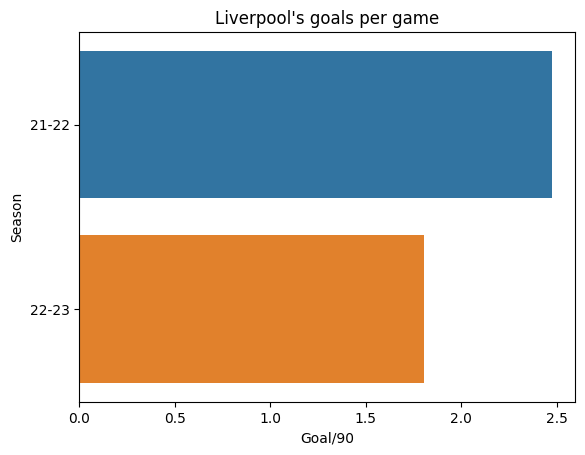

In [22]:
sns.barplot(y='Season', x='G/90', data=table[table.Team == 'Liverpool'])
plt.title("Liverpool's goals per game")
plt.xlabel("Goal/90")
plt.ylabel("Season")

df_22_23_liv คือ dataframe ที่คัดมาเฉพาะทีม Liverpool จากทีมทั้ง Premier League df_22_23_liv_fw คือ dataframe ที่คัดมาเฉพาะทีม Liverpool และ position ตัวรุก half_playtime คือ ระยะเวลาการเล่นครึ่งนึงของผู้เล่นที่ได้เล่นนานที่สุด(นาที) time_mean คือ ระยะเวลาเฉลี่ย

In [23]:
df_liv = df_prem[df_prem.Team == 'Liverpool'] #filter LIV
df_liv_fw = df_liv[df_liv.Pos.str.contains('FW')] #filter forward
half_playtime = df_liv.sort_values(by='Min', ascending=False).head(1)['Min'].iloc[0] / 2 #ระยะเวลาที่เล่นครึ่งนึงของคนที่มากที่สุด
time_mean = df_liv.Min.mean()
time_mean

915.4074074074074

### กราฟแสดงระยะเวลาในการเล่นของผู้เล่นทีม Liverpool

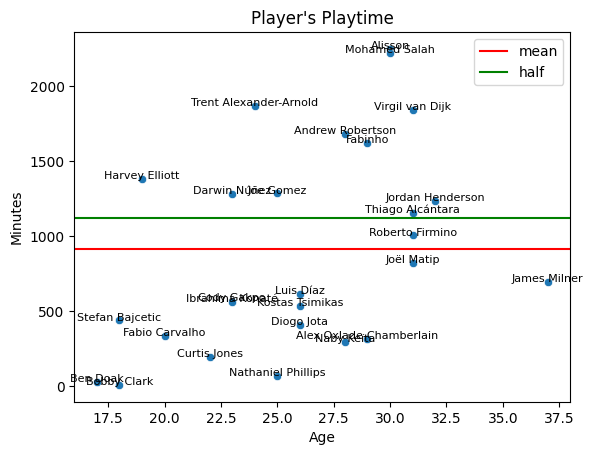

In [24]:
sns.scatterplot(data=df_liv, x='Age', y='Min')
plt.axhline(time_mean, color='red', label='mean')
plt.axhline(half_playtime, color='green', label='half')
for i, row in df_liv.iterrows():
    plt.text(row['Age'] , row['Min'], row['Name'], fontsize=8, ha='center')
plt.title("Player's Playtime")
plt.ylabel("Minutes")
plt.legend()

สังเกตจากตารางข้างบนเราจะเห็นได้ว่ามีบางผู้เล่นที่ได้เล่นนานกว่าเวลาเฉลี่ยอีก และผู้เล่นที่ได้เล่นน้อยกว่าเวลาเฉลี่ย (เส้นสีแดง) และ มีเส้นสีเขียวที่แบ่งให้เห็นถึงระยะเวลาครึ่งนึง (ครึ่ง match)

df_22_23_liv_low คือ dataframe ที่คัดเฉพาะผู้เล่นที่ได้รับเวลาเล่นน้อยกว่าเวลาเฉลี่ย
df_22_23_liv_high คือ dataframe ที่คัดเฉพาะผู้เล่นที่ได้รับเวลาเล่นมากกว่าเวลาเฉลี่ย
column ชื่อ Playtime บ่งบอกว่าผู้เล่นนั้นได้รับเวลามากกว่า (high) หรือ น้อยกว่าเวลาเฉลี่ย (low)

จากการที่เราสืบค้นและเพื่อทำให้การวิเคราะห์เป็นไปตามเป้าหมายที่วางไว้ การวิเคราะห์เรื่องนี้จึงต้องตัด นักเตะที่มีอาการบาดเจ็บออก ได้แก่
Luis Díaz, Diogo Jota, Naby Keïta, และ Cody Gakpo ทั้งหมด 4 คน, โดยผู้เล่นบาดเจ็บเหล่านี้จะมีผลกับการวิเคราะห์เฉพาะ ผู้เล่นที่ได้รับเวลาเล่นน้อยกว่าเวลาเฉลี่ย
df_22_23_liv_low_ninj คือ dataframe ที่เราจะคัดนักเตะที่บาดเจ็บออกจาก df_22_23_liv_low
df_22_23_liv_fw_low_ninj คือนำ dataframe เดิมมาคัดให้เหลือแค่ตำแหน่ง ตัวรุก
df_22_23_liv_fw_high คือ df_22_23_liv_high ที่คัดเฉพาะตำแหน่ง ตัวรุก

In [25]:
df_liv_low = df_liv[df_liv.Min < time_mean]
df_liv_low['PlayTime'] = 'low'
df_liv_high = df_liv[df_liv.Min >= time_mean]
df_liv_high['PlayTime'] = 'high'
liv_inj = ['Luis', 'Diogo', 'Naby', 'Cody']
df_liv_low_ninj = df_liv_low[~df_liv_low['Name'].str.contains('|'.join(liv_inj))]
df_liv_fw_low_ninj = df_liv_low_ninj[df_liv_low_ninj.Pos.str.contains('FW')]
df_liv_fw_high = df_liv_high[df_liv_high.Pos.str.contains('FW')]
# df_liv_low.sort_values(by='Min', ascending=False)


/var/folders/hw/nfjszs0936lcb1b4lz7lwkkm0000gn/T/ipykernel_38753/562016381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liv_low['PlayTime'] = 'low'
/var/folders/hw/nfjszs0936lcb1b4lz7lwkkm0000gn/T/ipykernel_38753/562016381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liv_high['PlayTime'] = 'high'


โดยผู้เล่นที่ได้รับเวลาเล่นน้อยกว่าเวลาเฉลี่ย มีทั้งหมด 15 คน
โดยผู้เล่นที่ได้รับเวลาเล่นมากกว่าเวลาเฉลี่ย มีทั้งหมด 11 คน

In [26]:
df_liv_low.shape

(15, 116)

In [27]:
df_liv_low_ninj.shape

(11, 116)

ตารางนี้เป็นการแสดงผลผู้เล่นตำแหน่งตัวรุกที่ได้รับเวลาเล่นน้อยกว่าเวลาเฉลี่ย

In [28]:
df_liv_fw_low_ninj[['Name', 'Age', 'Pos', 'Min', 'TotCmp%', 'SCA/90', 'KP/90', 'Gls', 'Gls/90', 'xG', 'xG/90', 'G/Sh', 'Ast', 'xA', 'Ast/90', 'PlayTime']].sort_values(by='Gls/90', ascending=False)

,Name,Age,Pos,Min,TotCmp%,SCA/90,KP/90,Gls,Gls/90,xG,xG/90,G/Sh,Ast,xA,Ast/90,PlayTime
461,Fabio Carvalho,20,MFFW,337,82.2,2.40,0.27,2,0.53,1.1,0.30,0.18,0,0.2,0.0,low
1915,Alex Oxlade-Chamberlain,29,FWMF,314,73.7,2.59,1.43,1,0.29,1.3,0.37,0.14,0,0.2,0.0,low
730,Ben Doak,17,FW,26,71.4,0.00,0.00,0,0.00,0.0,0.00,NaN,0,0.0,0.0,low
1244,Curtis Jones,22,MFFW,195,85.8,4.62,0.91,0,0.00,0.2,0.08,0.00,0,0.3,0.0,low


ตารางนี้เป็นการแสดงผลผู้เล่นตำแหน่งตัวรุกที่ได้รับเวลาเล่นมากกว่าเวลาเฉลี่ย

In [29]:
df_liv_fw_high[['Name', 'Age', 'Pos', 'Min', 'TotCmp%', 'SCA/90', 'KP/90', 'Gls', 'Gls/90', 'xG', 'xG/90', 'G/Sh', 'Ast', 'xA', 'Ast/90', 'PlayTime']].sort_values(by='Gls/90', ascending=False)

,Name,Age,Pos,Min,TotCmp%,SCA/90,KP/90,Gls,Gls/90,xG,xG/90,G/Sh,Ast,xA,Ast/90,PlayTime
880,Roberto Firmino,31,FWMF,1006,78.5,3.66,1.79,8,0.72,4.5,0.40,0.24,4,1.8,0.36,high
1850,Darwin Núñez,23,FW,1282,63.2,3.23,1.62,8,0.56,10.3,0.72,0.11,3,2.3,0.21,high
2220,Mohamed Salah,30,FW,2225,75.7,3.84,1.90,11,0.44,11.8,0.48,0.14,7,4.4,0.28,high
801,Harvey Elliott,19,MFFW,1383,79.5,3.97,1.30,1,0.07,1.7,0.11,0.04,2,3.9,0.13,high


ตารางนี้เป็นการรวมตารางกันของทั้งผู้เล่นตำแหน่งตัวรุกที่ได้รับเวลาเล่นน้อยกว่าเวลาเฉลี่ย และ ผู้เล่นตำแหน่งตัวรุกที่ได้รับเวลาเล่นมากกว่าเวลาเฉลี่ย

In [30]:
df_pt = pd.concat([df_liv_fw_low_ninj, df_liv_fw_high])
df_pt.pivot_table(index=['Name', 'Pos'], values=['Age', 'Min', 'TotCmp%', 'SCA/90', 'KP/90', 'Gls', 'Gls/90', 'xG', 'xG/90', 'G/Sh', '(Gls-xG)/90', 'PlayTime'])


/var/folders/hw/nfjszs0936lcb1b4lz7lwkkm0000gn/T/ipykernel_38753/3040165568.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_pt.pivot_table(index=['Name', 'Pos'], values=['Age', 'Min', 'TotCmp%', 'SCA/90', 'KP/90', 'Gls', 'Gls/90', 'xG', 'xG/90', 'G/Sh', '(Gls-xG)/90', 'PlayTime'])


,,(Gls-xG)/90,Age,G/Sh,Gls,Gls/90,KP/90,Min,SCA/90,TotCmp%,xG,xG/90
Name,Pos,,,,,,,,,,,
Alex Oxlade-Chamberlain,FWMF,-0.08,29,0.14,1,0.29,1.43,314,2.59,73.7,1.3,0.37
Ben Doak,FW,0.00,17,NaN,0,0.00,0.00,26,0.00,71.4,0.0,0.00
Curtis Jones,MFFW,-0.08,22,0.00,0,0.00,0.91,195,4.62,85.8,0.2,0.08
Darwin Núñez,FW,-0.16,23,0.11,8,0.56,1.62,1282,3.23,63.2,10.3,0.72
Fabio Carvalho,MFFW,0.23,20,0.18,2,0.53,0.27,337,2.40,82.2,1.1,0.30
Harvey Elliott,MFFW,-0.04,19,0.04,1,0.07,1.30,1383,3.97,79.5,1.7,0.11
Mohamed Salah,FW,-0.04,30,0.14,11,0.44,1.90,2225,3.84,75.7,11.8,0.48
Roberto Firmino,FWMF,0.32,31,0.24,8,0.72,1.79,1006,3.66,78.5,4.5,0.40


### Carvalho และ Chamberlain ที่มีโอกาสในการเล่นน้อยกว่าแต่ ผลงานต่อโอากสที่ได้เล่น ดีกว่า Elliott ที่ได้รับโอกาสในการเล่นมากกว่า

เมื่อนำตารางข้างบนมา plot เป็นกราฟ ซึ่งแกน x คือ Gls/90 (อัตราส่วนการทำประตูต่อ 90 นาที) ส่วนแกน y คือ xG/90 (อัตราส่วนการประตูที่คาดว่าจะทำได้ต่อ 90 นาที) โดยจะมี สีของจุดเป็นตัวแบ่งผู้เล่นว่าผู้เล่นใด ได้รับเวลาเล่นมากกว่าหรือน้อยกว่าเวลาเฉลี่ย

จากการสังเกตกราฟ แสดงให้เห็นว่า Fabio Carvalho และ Oxlade-Chamberlain มีผลงานต่อโอกาสที่ดีกว่า Harvey Elliott ทั้งๆที่ทั้งคู่นั้นเป็นนักเตะที่ได้รับเวลาเล่นน้อยกว่าเวลาเฉลี่ยซะอีก แต่กลับกัน Harvey Elliott นั้นได้เวลาการลงเตะมากกว่า 2 คนนั้นที่มีผลงานต่อโอกาสดีกว่า

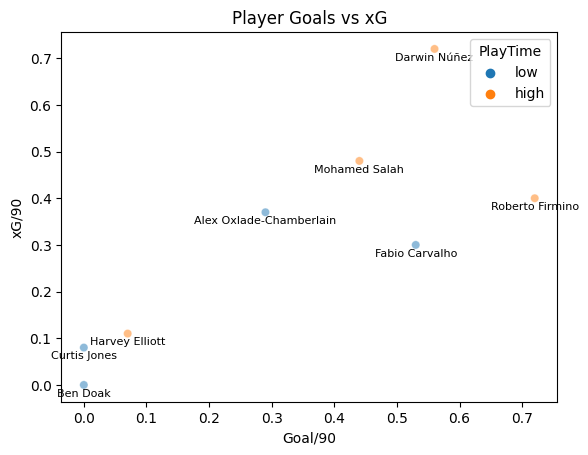

In [31]:
sns.scatterplot(x='Gls/90', y='xG/90', data=df_pt, hue='PlayTime', alpha=0.5)
plt.title("Player Goals vs xG")
plt.xlabel("Goal/90")
for i, row in df_pt.iterrows():
    plt.text(row['Gls/90'] , row['xG/90']-0.025, row['Name'], fontsize=8, ha='center')

ต่อมาจะเป็นการ plot กราฟแสดงผล Conversion Rates โดย คำนวณมากจากการนำ G/Sh (จำนวนประตูที่ทำได้ / จำนวนการยิงประตู) โดยจะมี สีของจุดเป็นตัวแบ่งผู้เล่นว่าผู้เล่นใด ได้รับเวลาเล่นมากกว่าหรือน้อยกว่าเวลาเฉลี่ย

ยิ่ง Conversion Rates มากยิ่งแปลว่าผู้เล่นนั้นมีศักยภาพในการยิงประตูแล้วทำประตูได้มาก => หรือยิ่ง Conversion Rates มากก็แสดงให้เห็นว่าผู้เล่นนั้นใช้โอกาสได้คุ้มค่า

Text(0, 0.5, '')

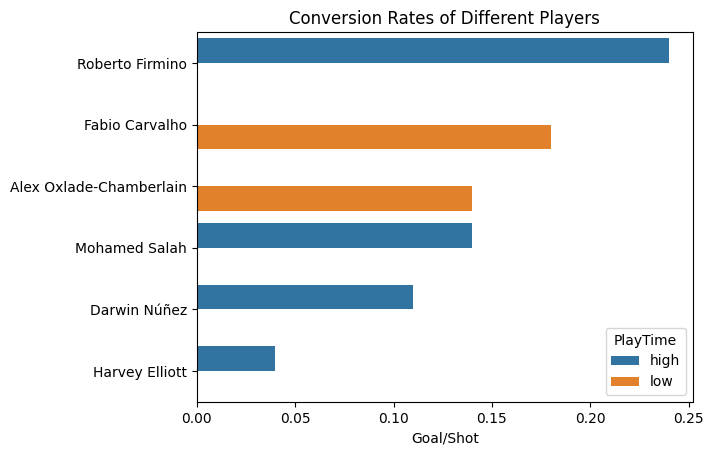

In [32]:
sns.barplot(y='Name', x='G/Sh', data=df_pt[df_pt['G/Sh'] > 0].sort_values(by='G/Sh', ascending=False), hue='PlayTime')
plt.title('Conversion Rates of Different Players')
plt.xlabel("Goal/Shot")
plt.ylabel("")


### Fabio Carvalho สมควรได้รับเวลาในการลงเล่นมากขึ้น

จากการสังเกตกราฟนั้น จะเห็นได้ว่า Convertion Rates ของ Fabio Carvalho และ Alex Oxlade-Chamberlain มีค่าสูงกว่า Mohamed Salah, Darwin Nunez และ Harvey Elliott ซึ่งเป็นผู้เล่นที่ได้รับเวลาเล่นมากกว่าเวลาเฉลี่ย

จึงสรุปได้ว่าทั้ง Fabio Carvalho และ Alex Oxlade-Chamberlain  สมควรที่จะได้รับเวลาเพิ่มในการลงสนามในแต่ละ match เพราะมี performance ที่ดีกว่าผู้เล่นบางคนที่ได้รับเวลามากกว่านั่นเอง โดยถ้าต้องเลือกเพียงแค่ 1 คนที่สมควรได้รับเวลาในการเล่นเพิ่มมากที่สุด นั่นก็คือ Fabio Carvalho จากการที่เขามี Conversion Rate สูงกว่า Alex Oxlade-Chamberlain




## จุดพีคสุดของผู้รักษาประตูอยู่ที่ช่วงอายุประมาณ 27-31 ปี

- เราจะเริ่มจากการใช้ข้อมูลนักเตะที่เล่นอยู่ใน 5 ลีกยุโรปตั้งแต่ฤดูกาล 2018-2023 และต้องเป็นผู้เล่นที่มี 90s (นาทีในการลงเล่นทั้งฤดูกาลหารด้วย 90) มากกว่า 15 เกม

In [33]:
# We will use the data of the player who exist in all these 5 seasons (Exist in every seasons)

# Group the dataframe by player name
grouped_df = gk.groupby('Player')

# Count the number of unique seasons each player has played in
season_counts = grouped_df['Season'].nunique()

# Filter the dataframe to only include players who have played in all five seasons
filtered_gk = gk[gk['Player'].isin(season_counts[season_counts == 5].index)]

# Filter only the player whose 90s is more than 15 (90s : minutes played divided by 90)
filtered_gk = filtered_gk.loc[filtered_gk['90s'] > 15]

- filtered_gk_18_22 คือ dataframe ที่คัดฤดูกาลที่ 2022-2023 ออกแล้ว

In [34]:
# There are some metrics that's not updated in 2023
filtered_gk_18_22 = filtered_gk.loc[filtered_gk.Season != '22-23']

### หน่วยวัดต่างๆที่เราใช้ในการวิเคราะห์ข้อมูลในประเด็นนี้
- Save Percentage (Save%) [float]: เปอร์เซ็นต์ในการเซฟประตู
- Cleansheet Percentage (CS%) [float]: เปอร์เซ็นต์การเก็บ cleansheet
- Penalty Kicks Save Percentage (PSave%) [float]: เปอร์เซ็นต์ในการเซฟจุดโทษ 
- Defensive action outside of penalty area per 90 minutes (OPA/90) [float]: อัตราส่วนการป้องกันนอกเขตโทษต่อ 90 นาที  
- Post-Shot Expected Goals minus Goals Allowed per 90 minutes (PSxG-GA/90)
   [float]: อัตราส่วนจำนวนประตูที่คาดว่าจะทำได้โดยคำนึงถึงศักยภาพการเซฟประตูของผู้รักษาประตู - ประตูที่เข้าจริง / 90 นาที 
  *cleansheet คือ การที่ทีมไม่เสียประตูเลยในเกมนั้นๆ
#### เพื่อที่จะสามารถระบุผู้รักษาประตูที่ดีได้นั้น เราต้องวิเคราะห์ข้อมูลที่เฉพาะเจาะจง เช่น สไตล์การเล่นของลีกนั้นๆที่แต่ละผู้เล่นอยู่ แต่ในการวิเคราะห์ประเด็นข้างต้นนี้ เราจะโฟกัสและเจาะจงไปที่จุดพีคของผู้รักษาประตูในแต่ละฤดูกาล

### Save% : Save Percentage 
- (Shots on target against - Goals against) / Shots on target against
- (ลูกที่ยิงตรงกรอบ - ลูกที่ยิงเข้า) / ลูกที่ยิงตรงกรอบ

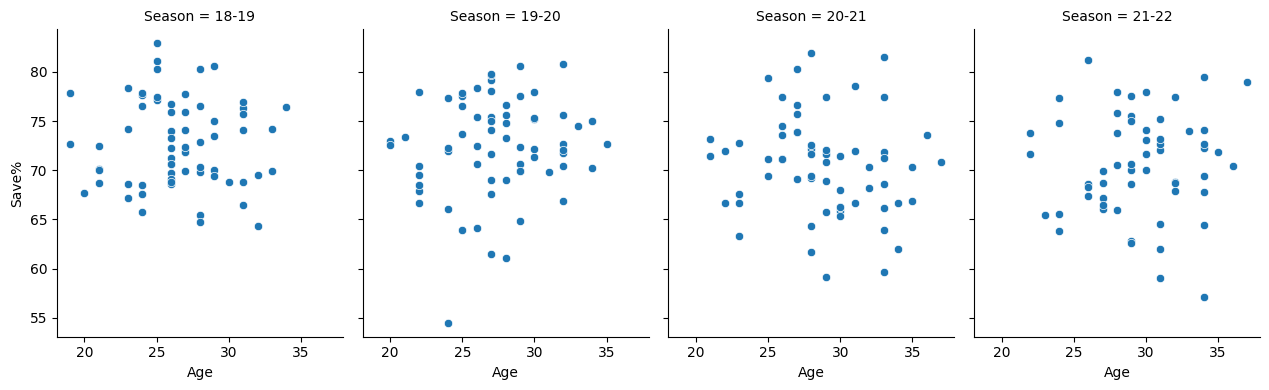

In [35]:
sns.relplot(data=filtered_gk_18_22, x='Age', y='Save%',
           col='Season',
           col_order=['18-19', '19-20', '20-21', '21-22',],
            height=4, aspect=0.8)

- ผู้รักษาประตูที่มี Save% มากที่สุดในแต่ละฤดูกาล

In [36]:
filtered_gk_18_22.loc[filtered_gk_18_22.groupby('Season')['Save%'].idxmax(), ['Player', 'Comp','Age', 'Season', 'Save%', '90s']].sort_values(by='Season', )

,Player,Comp,Age,Season,Save%,90s
128,Jan Oblak,La Liga,25,18-19,82.9,37.0
297,Hugo Lloris,Premier League,32,19-20,80.8,20.1
448,Thibaut Courtois,La Liga,28,20-21,81.9,38.0
726,Mike Maignan,Serie A,26,21-22,81.2,32.0


- เราจะใช้เปอร์เซ็นไทล์ที่ 95 ของ Save% เพื่อที่จะระบุว่าผู้รักษาประตูคนใดคือหนึ่งในผู้รักษาประตูที่ดีที่สุด 

In [37]:
save_per95 = round(filtered_gk_18_22['Save%'].quantile(0.95), 4)
save_per95

79.61

- ผู้รักษาประตูที่ Save% อยู่เหนือเปอร์เซ็นไทล์ที่ 95

In [38]:
top_save = filtered_gk_18_22.loc[filtered_gk_18_22['Save%'] >= save_per95, ['Player', 'Comp','Age', 'Born', 'Season', 'Save%', '90s']].sort_values(by='Season', )
top_save

,Player,Comp,Age,Born,Season,Save%,90s
6,Alphonse Areola,Ligue 1,25,1993,18-19,80.3,21.0
14,Walter Benítez,Ligue 1,25,1993,18-19,81.1,35.0
75,Péter Gulácsi,Bundesliga,28,1990,18-19,80.3,32.5
124,Neto,La Liga,29,1989,18-19,80.6,34.0
128,Jan Oblak,La Liga,25,1993,18-19,82.9,37.0
297,Hugo Lloris,Premier League,32,1986,19-20,80.8,20.1
310,Edouard Mendy,Ligue 1,27,1992,19-20,79.7,24.0
365,Gerónimo Rulli,Ligue 1,27,1992,19-20,79.8,25.0
388,Wojciech Szczęsny,Serie A,29,1990,19-20,80.6,28.8
448,Thibaut Courtois,La Liga,28,1992,20-21,81.9,38.0


- ผู้รักษาประตูที่ Save% อยู่เหนือเปอร์เซ็นไทล์ที่ 95 และมีช่วงอายุอยู่ระหว่าง 27 ถึง 31 ปี


In [39]:
top_save_age_27_31 = filtered_gk_18_22.loc[(filtered_gk_18_22['Save%'] >= save_per95) & ((filtered_gk_18_22.Age >= 27) & (filtered_gk_18_22.Age <= 31)), ['Player', 'Comp','Age', 'Born', 'Season', 'Save%', '90s', 'Save%',]].sort_values(by='Season', )
top_save_age_27_31

,Player,Comp,Age,Born,Season,Save%,90s,Save%
75,Péter Gulácsi,Bundesliga,28,1990,18-19,80.3,32.5,80.3
124,Neto,La Liga,29,1989,18-19,80.6,34.0,80.6
310,Edouard Mendy,Ligue 1,27,1992,19-20,79.7,24.0,79.7
365,Gerónimo Rulli,Ligue 1,27,1992,19-20,79.8,25.0,79.8
388,Wojciech Szczęsny,Serie A,29,1990,19-20,80.6,28.8,80.6
448,Thibaut Courtois,La Liga,28,1992,20-21,81.9,38.0,81.9
537,Jan Oblak,La Liga,27,1993,20-21,80.3,38.0,80.3


- ต่อมาเราจะทำการเปรียบเทียบจำนวนผู้รักษาประตูที่เป็นผู้รักษาประตูแนวหน้า กับ จำนวนผู้รักษาประตูที่เป็นผู้รักษาประตูแนวหน้าและมีช่วงอายุอยู่ระหว่าง 27-31 ปี

In [40]:
round((top_save_age_27_31.Player.size / top_save.Player.size) * 100, 2)

53.85

- ซึ่งเราจะเห็นได้ว่า ผู้รักษาประตูที่เป็นผู้รักษาประตูแนวหน้าในเรื่องของ Save% และมีช่วงอายุอยู่ระหว่าง 27-31 ปี อยู่ทีประมาณร้อยละ 53.85 ของทั้งหมด

### CS% : Cleansheet Percentage 
(Percentage of match that result in cleansheet)
เปอร์เซ็นต์ในการไม่เสียประตูเลยใน match

Text(912.7482638888889, 0.5, 'Clean Sheet%')

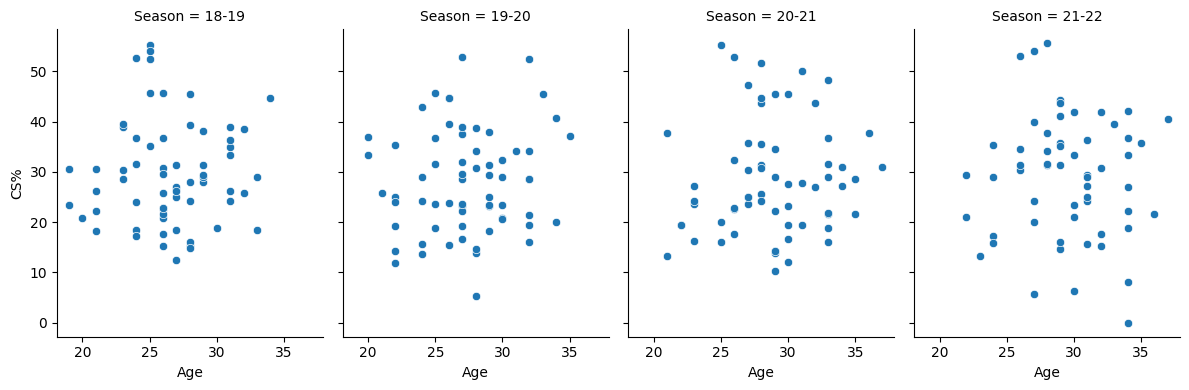

In [41]:
# CS% : Cleansheet Percentage (Percentage of match that result in cleansheet)
sns.relplot(data=filtered_gk_18_22, x='Age', y='CS%',
           col='Season',
           col_order=['18-19', '19-20', '20-21', '21-22',],
            height=4, aspect=0.75)
plt.ylabel("Clean Sheet%")

- ผู้เล่นอันดับต้นๆในเรื่องของเปอร์เซ็นต์การเก็บ cleansheet ของแต่ละฤดูกาล

In [42]:
filtered_gk_18_22.loc[filtered_gk_18_22.groupby('Season')['CS%'].idxmax(), ['Player', 'Comp','Age', 'Born', 'Season', 'CS', 'MP', 'CS%',]].sort_values(by='Season', )

,Player,Comp,Age,Born,Season,CS,MP,CS%
2,Alisson,Premier League,25,1992,18-19,21.0,38,55.3
240,Thibaut Courtois,La Liga,27,1992,19-20,18.0,34,52.9
511,Mike Maignan,Ligue 1,25,1995,20-21,21.0,38,55.3
617,Alisson,Premier League,28,1992,21-22,20.0,36,55.6


In [43]:
cs_per95 = round(filtered_gk_18_22['CS%'].quantile(0.95), 4)
cs_per95

49.235

- ผู้รักษาประตูที่มี CS% อยู่เหนือเปอร์เซ็นไทล์ที่ 95 


In [44]:
top_cs = filtered_gk_18_22.loc[filtered_gk_18_22['CS%'] >= cs_per95, ['Player', 'Comp','Age', 'Born', 'Season', 'CS', 'MP', 'CS%',]].sort_values(by='Season', )
top_cs

,Player,Comp,Age,Born,Season,CS,MP,CS%
2,Alisson,Premier League,25,1992,18-19,21.0,38,55.3
6,Alphonse Areola,Ligue 1,25,1993,18-19,11.0,21,52.4
53,Ederson,Premier League,24,1993,18-19,20.0,38,52.6
128,Jan Oblak,La Liga,25,1993,18-19,20.0,37,54.1
240,Thibaut Courtois,La Liga,27,1992,19-20,18.0,34,52.9
318,Keylor Navas,Ligue 1,32,1986,19-20,11.0,21,52.4
460,Ederson,Premier League,26,1993,20-21,19.0,36,52.8
511,Mike Maignan,Ligue 1,25,1995,20-21,21.0,38,55.3
521,Edouard Mendy,Premier League,28,1992,20-21,16.0,31,51.6
541,David Ospina,Serie A,31,1988,20-21,8.0,16,50.0


- ผู้รักษาประตูที่มี CS% อยู่เหนือเปอร์เซ็นไทล์ที่ 95 และมีช่วงอายุอยู่ระหว่าง 27 ถึง 31 ปี

In [45]:
top_cs_age_27_31 = filtered_gk_18_22.loc[(filtered_gk_18_22['CS%'] >= cs_per95) & ((filtered_gk_18_22.Age >= 27) & (filtered_gk_18_22.Age <= 31)), ['Player', 'Comp','Age', 'Born', 'Season', 'CS', 'MP', 'CS%',]].sort_values(by='Season', )
top_cs_age_27_31

,Player,Comp,Age,Born,Season,CS,MP,CS%
240,Thibaut Courtois,La Liga,27,1992,19-20,18.0,34,52.9
521,Edouard Mendy,Premier League,28,1992,20-21,16.0,31,51.6
541,David Ospina,Serie A,31,1988,20-21,8.0,16,50.0
617,Alisson,Premier League,28,1992,21-22,20.0,36,55.6
669,Ederson,Premier League,27,1993,21-22,20.0,37,54.1


In [46]:
round((top_cs_age_27_31.Player.size / top_cs.Player.size) * 100, 2)

38.46

- เมื่อเราทำการวิเคราะห์เปอร์เซ็นต์การเก็บ cleansheet, เราก็จะพบว่าผู้รักษาประตูที่มี CS% เป็นอันดับต้นนั้นและอายุอยู่ในช่วง 27-31 ปี มีมากถึง 38.46% ของทั้งหมด ซึ่งเหมือนกันกับ Save% ที่มีมากถึง 53.85%

### PSave% : Penalty Kicks Save Percentage
(Penalty goal against (PKA) / penalty kick attempts (PKatt))
เปอร์เซ็นต์ในการเซฟจุดโทษ


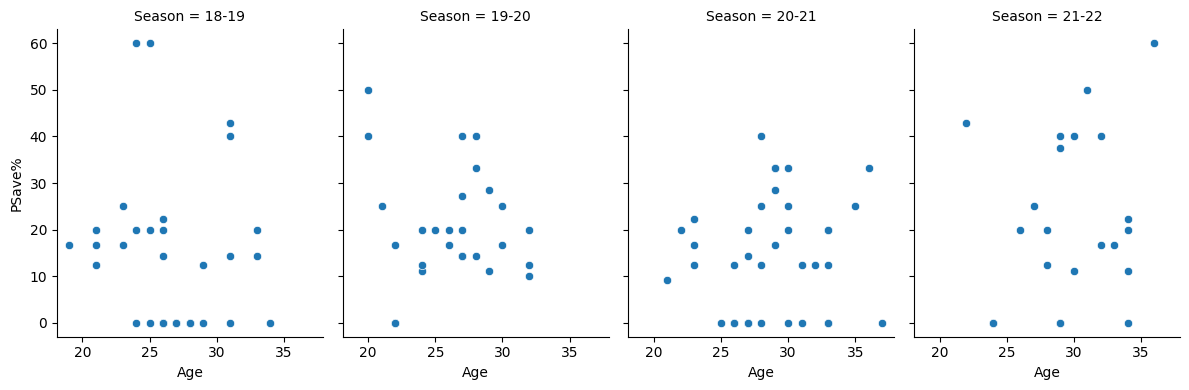

In [47]:
# PSave% : Penalty Kicks Save Percentage
pSave = filtered_gk_18_22.loc[filtered_gk_18_22['PKatt'] >= 5] # we will use the data of the goalkeeper who have attempted the penalty kick more than 4 times
sns.relplot(data=pSave, x='Age', y='PSave%',
           col='Season',
           col_order=['18-19', '19-20', '20-21', '21-22',],
            height=4, aspect=0.75)

ผู้รักษาประตูที่มี PSave% มากสุดอันดับต้นในแต่ละฤดูกาล

นิยามของหน่วยวัดแต่ละหน่วย
- PKatt [float]: "Penalty kicks attempted"
  จำนวนครั้งที่มีการเตะลูกโทษ
- PKA [float]: "Penalty kicks allowed" 
  จำนวนครั้งที่โดนทำประตูได้จากลูกโทษ
- PKsv [float]: "Penalty kicks saved"
  จำนวนครั้งที่สามารถป้องกันลูกโทษได้
- PKm [float]: "Penalty kicks missed"
  จำนวนครั้งที่ผู้ยิง ยิงออกนอกกรอบ
- PSave% [float]: "Penalty save percentage" (penalty shot that missed not included)
  เปอร์เซ็นต์ในการเซฟลูกโทษ (ไม่นับจำนวนครั้งที่ผู้ยิงยิงออกนอกกรอบ)

In [48]:
pSave.loc[pSave.groupby('Season')['PSave%'].idxmax(), ['Player', 'Comp','Age', 'Born', 'Season', 'MP', 'PKatt', 'PKA', 'PKsv', 'PKm', 'PSave%',]].sort_values(by='Season', )

,Player,Comp,Age,Born,Season,MP,PKatt,PKA,PKsv,PKm,PSave%
14,Walter Benítez,Ligue 1,25,1993,18-19,35,5.0,2.0,3.0,0.0,60.0
247,Gianluigi Donnarumma,Serie A,20,1999,19-20,36,8.0,4.0,4.0,0.0,50.0
439,Koen Casteels,Bundesliga,28,1992,20-21,32,5.0,3.0,2.0,0.0,40.0
672,Łukasz Fabiański,Premier League,36,1985,21-22,37,6.0,2.0,3.0,1.0,60.0


In [49]:
pSave_per95 = round(filtered_gk_18_22['PSave%'].quantile(0.95), 4)
pSave_per95

50.0

- ผู้รักษาประตูที่ PSave% อยู่เหนือเปอร์เซ็นต์ไทล์ที่ 95

In [50]:
top_Psave = filtered_gk_18_22.loc[filtered_gk_18_22['PSave%'] >= pSave_per95, ['Player', 'Comp','Age', 'Born', 'Season', 'MP', 'PKatt', 'PKA', 'PKsv', 'PKm', 'PSave%',]].sort_values(by='Season', )
top_Psave

,Player,Comp,Age,Born,Season,MP,PKatt,PKA,PKsv,PKm,PSave%
7,Kepa Arrizabalaga,Premier League,23,1994,18-19,36,2.0,1.0,1.0,0.0,50.0
14,Walter Benítez,Ligue 1,25,1993,18-19,35,5.0,2.0,3.0,0.0,60.0
141,Jordan Pickford,Premier League,24,1994,18-19,38,5.0,2.0,3.0,0.0,60.0
172,Salvatore Sirigu,Serie A,31,1987,18-19,36,4.0,2.0,2.0,0.0,50.0
184,Wojciech Szczęsny,Serie A,28,1990,18-19,28,3.0,1.0,1.0,1.0,50.0
185,Ciprian Tătărușanu,Ligue 1,32,1986,18-19,27,4.0,1.0,3.0,0.0,75.0
405,Robin Zentner,Bundesliga,24,1994,19-20,22,2.0,1.0,1.0,0.0,50.0
332,Rui Patrício,Premier League,31,1988,19-20,38,3.0,1.0,2.0,0.0,66.7
381,Yann Sommer,Bundesliga,30,1988,19-20,34,2.0,1.0,1.0,0.0,50.0
247,Gianluigi Donnarumma,Serie A,20,1999,19-20,36,8.0,4.0,4.0,0.0,50.0


- ผู้รักษาประตูที่ PSave% อยู่เหนือเปอร์เซ็นต์ไทล์ที่ 95 และมีช่วงอายุอยู่ระหว่าง 27 ถึง 31 ปี

In [51]:
top_Psave_age_27_31 = filtered_gk_18_22.loc[(filtered_gk_18_22['PSave%'] >= pSave_per95) & ((filtered_gk_18_22.Age >= 27) & (filtered_gk_18_22.Age <= 31)), ['Player', 'Comp','Age', 'Born', 'Season', 'MP', 'PKatt', 'PKA', 'PKsv', 'PKm', 'PSave%',]].sort_values(by='Season', )
top_Psave_age_27_31

,Player,Comp,Age,Born,Season,MP,PKatt,PKA,PKsv,PKm,PSave%
172,Salvatore Sirigu,Serie A,31,1987,18-19,36,4.0,2.0,2.0,0.0,50.0
184,Wojciech Szczęsny,Serie A,28,1990,18-19,28,3.0,1.0,1.0,1.0,50.0
308,Alex McCarthy,Premier League,29,1989,19-20,28,2.0,1.0,1.0,0.0,50.0
332,Rui Patrício,Premier League,31,1988,19-20,38,3.0,1.0,2.0,0.0,66.7
381,Yann Sommer,Bundesliga,30,1988,19-20,34,2.0,1.0,1.0,0.0,50.0
490,Lukáš Hrádecký,Bundesliga,30,1989,20-21,29,2.0,1.0,1.0,0.0,50.0
504,Bernd Leno,Premier League,28,1992,20-21,35,2.0,1.0,1.0,0.0,50.0
537,Jan Oblak,La Liga,27,1993,20-21,38,4.0,1.0,2.0,1.0,66.7
817,Wojciech Szczęsny,Serie A,31,1990,21-22,33,6.0,3.0,3.0,0.0,50.0


In [52]:
round((top_Psave_age_27_31.Player.size / top_Psave.Player.size) * 100, 2)

42.86

- เมื่อเราทำการวิเคราะห์เปอร์เซ็นต์ของการเซฟลูกโทษแล้ว, เราก็จะพบว่าผู้รักษาประตูที่มี PSave% เป็นอันดับต้นนั้นและอายุอยู่ในช่วง 27-31 ปี มีมากถึง 42.86% ของทั้งหมด

### OPA/90 : Defensive action outside of penalty area per 90 minutes

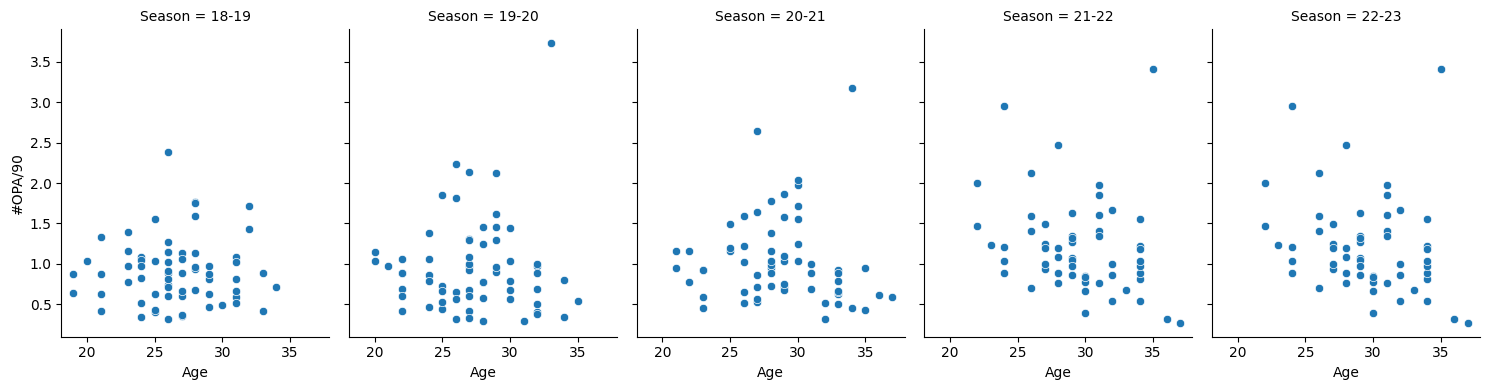

In [53]:
# OPA/90 : Defensive action outside of penalty area per 90 mins
opa = filtered_gk.loc[filtered_gk['#OPA'] > 5]
sns.relplot(data=opa, x='Age', y='#OPA/90',
           col='Season',
           col_order=['18-19', '19-20', '20-21', '21-22', '22-23'],
            height=4, aspect=0.75)

ผู้รักษาประตูที่มี PSave% มากสุดอันดับต้นในแต่ละฤดูกาล

นิยามของหน่วยวัดแต่ละหน่วย
- #OPA [float]: Defensive actions outside penalty area
  การออกมาป้องกันนอกเขตโทษ
- #OPA/90 [float]: Defensive actions outside penalty area per 90 mins
  อัตราส่วนการออกมาป้องกันนอกเขตโทษต่อ 90 นาที
- AvgDist [float]: Average distance of defensive actions
  ระยะทางเฉลี่ยของการป้องกันนอกเขตโทษ

In [54]:
opa.loc[opa.groupby('Season')['#OPA/90'].idxmax(), ['Player', 'Comp','Age', 'Born', 'Season', '90s', '#OPA', '#OPA/90', 'AvgDist']].sort_values(by='Season', )

,Player,Comp,Age,Born,Season,90s,#OPA,#OPA/90,AvgDist
45,Marko Dmitrović,La Liga,26,1992,18-19,24.0,57.0,2.38,18.6
320,Manuel Neuer,Bundesliga,33,1986,19-20,33.0,123.0,3.73,23.7
534,Manuel Neuer,Bundesliga,34,1986,20-21,33.0,105.0,3.18,23.6
746,Manuel Neuer,Bundesliga,35,1986,21-22,27.9,95.0,3.41,26.2
964,Manuel Neuer,Bundesliga,35,1986,22-23,27.9,95.0,3.41,26.2


In [55]:
opa_per95 = round(opa['#OPA/90'].quantile(0.95), 4)
opa_per95

2.034

- ผู้รักษาประตูที่ #OPA/90 อยู่เหนือเปอร์เซ็นต์ไทล์ที่ 95 


In [56]:
top_opa = opa.loc[opa['#OPA/90'] >= opa_per95, ['Player', 'Comp','Age', 'Born', 'Season', '90s', '#OPA', '#OPA/90', 'AvgDist',]].sort_values(by='Season', )
top_opa

,Player,Comp,Age,Born,Season,90s,#OPA,#OPA/90,AvgDist
45,Marko Dmitrović,La Liga,26,1992,18-19,24.0,57.0,2.38,18.6
206,Alisson,Premier League,26,1992,19-20,28.3,63.0,2.23,19.2
245,Marko Dmitrović,La Liga,27,1992,19-20,35.0,75.0,2.14,17.9
269,Péter Gulácsi,Bundesliga,29,1990,19-20,32.0,68.0,2.13,18.5
320,Manuel Neuer,Bundesliga,33,1986,19-20,33.0,123.0,3.73,23.7
409,Alisson,Premier League,27,1992,20-21,33.0,87.0,2.64,18.6
490,Lukáš Hrádecký,Bundesliga,30,1989,20-21,28.5,58.0,2.04,18.2
534,Manuel Neuer,Bundesliga,34,1986,20-21,33.0,105.0,3.18,23.6
617,Alisson,Premier League,28,1992,21-22,36.0,89.0,2.47,18.7
634,Paul Bernardoni,Ligue 1,24,1997,21-22,19.0,56.0,2.95,18.9


- ผู้รักษาประตูที่ #OPA/90 อยู่เหนือเปอร์เซ็นต์ไทล์ที่ 95 และมีช่วงอายุอยู่ระหว่าง 27 ถึง 31 ปี


In [57]:
top_opa_age_27_31 = opa.loc[(opa['#OPA/90'] >= opa_per95) & ((filtered_gk_18_22.Age >= 27) & (filtered_gk_18_22.Age <= 31)), ['Player', 'Comp','Age', 'Born', 'Season', '90s', '#OPA', '#OPA/90', 'AvgDist',]].sort_values(by='Season', )
top_opa_age_27_31

,Player,Comp,Age,Born,Season,90s,#OPA,#OPA/90,AvgDist
245,Marko Dmitrović,La Liga,27,1992,19-20,35.0,75.0,2.14,17.9
269,Péter Gulácsi,Bundesliga,29,1990,19-20,32.0,68.0,2.13,18.5
409,Alisson,Premier League,27,1992,20-21,33.0,87.0,2.64,18.6
490,Lukáš Hrádecký,Bundesliga,30,1989,20-21,28.5,58.0,2.04,18.2
617,Alisson,Premier League,28,1992,21-22,36.0,89.0,2.47,18.7


In [58]:
round((top_opa_age_27_31.Player.size / top_opa.Player.size) * 100, 2)

31.25

- เมื่อเราทำการวิเคราะห์ค่า #OPA/90 แล้ว, เราก็จะพบว่าผู้รักษาประตูที่มี #OPA/90 เป็นอันดับต้นนั้นและอายุอยู่ในช่วง 27-31 ปี มีมากถึง 35.29% ของทั้งหมด


### PSxG - GA / 90 : Post-Shot Expected Goals minus Goals Allowed per 90 minutes
- การที่มีค่า PSxG - GA / 90 มาก แสดงให้เห็นถึงการที่ผู้รักษาประตูนั้นมีความสามารถและทักษะในการเซฟประตูเหนือผู้รักษาประตูทั่วไปซึ่งมีนัยในเรื่องของดวงในแต่ละจังหวะของผู้รักษาประตูด้วยด้วย
- PsXG [float]: จำนวนประตูที่คาดว่าจะทำได้โดยคำนึงถึงศักยภาพการเซฟประตูของผู้รักษาประตู
- PSxG - GA / 90 [float]: จำนวนประตูที่คาดว่าจะทำได้ โดยคำนึงถึงศักยภาพการเซฟประตูของผู้รักษาประตู - ประตูที่สามารถทำได้ / 90 นาที
  โดย PSxG - GA / 90 คือหน่วยวัดหรือค่าสถิติที่มีความเสถียรที่สุดในการที่เราจะระบุได้ว่าผู้รักษาประตูนั้นเป็นผู้รักษาประตูที่ดีหรือแย่

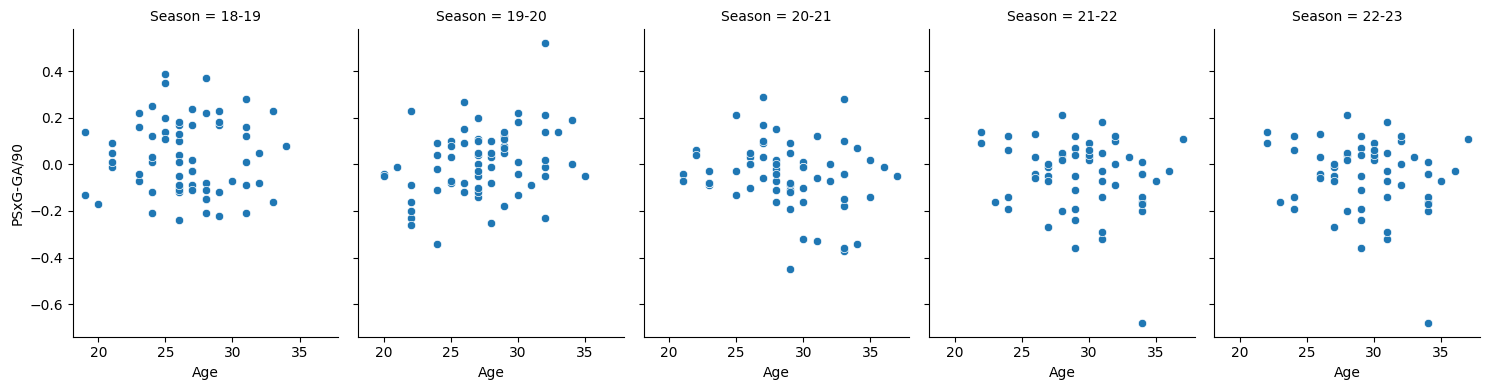

In [59]:
# PSxG - GA / 90 : Post-Shot Expected Goals minus Goals Allowed per 90 minutes
sns.relplot(data=filtered_gk, x='Age', y='PSxG-GA/90',
           col='Season',
           col_order=['18-19', '19-20', '20-21', '21-22', '22-23'],
            height=4, aspect=0.75)
# plot.set(ylabel='PSxG-GA/90')
# plt.show()

- ผู้เล่นอันดับต้นในเรื่อง PSxG-GA/90 ของแต่ละฤดูกาล

นิยามของหน่วยวัดแต่ละหน่วย
- PSxG [float]: Post-shot expected goals
  จำนวนประตูที่คาดว่าจะทำได้โดยคำนึงถึงศักยภาพการเซฟประตูของผู้รักษาประตู
- PSxG/SoT [float]: Post-shot expected goals per shot on target
  จำนวนประตูที่คาดว่าจะทำได้โดยคำนึงถึงศักยภาพการเซฟประตูของผู้รักษาประตู ต่อ การยิงที่เข้าประตู
- PSxG+/- [float]: Post-shot expected goals minus goals allow
  จำนวนประตูที่คาดว่าจะทำได้โดยคำนึงถึงศักยภาพการเซฟประตูของผู้รักษาประตู - ประตูที่ทำได้
- /90 [float]: Post-shot expected goals minus goals allow per 90 mins
  จำนวนประตูที่คาดว่าจะทำได้โดยคำนึงถึงศักยภาพการเซฟประตูของผู้รักษาประตู - ประตูที่ทำได้ต่อ 90 นาที

In [60]:
filtered_gk.loc[filtered_gk.groupby('Season')['PSxG-GA/90'].idxmax(), ['Player', 'Comp','Age', 'Born', 'Season', '90s', 'PSxG', 'PSxG/SoT', 'PSxG+/-', 'PSxG-GA/90', ]].sort_values(by='Season', )

,Player,Comp,Age,Born,Season,90s,PSxG,PSxG/SoT,PSxG+/-,PSxG-GA/90
128,Jan Oblak,La Liga,25,1993,18-19,37.0,39.3,0.27,14.3,0.39
297,Hugo Lloris,Premier League,32,1986,19-20,20.1,30.4,0.28,10.4,0.52
537,Jan Oblak,La Liga,27,1993,20-21,38.0,33.1,0.25,11.1,0.29
630,Walter Benítez,Ligue 1,28,1993,21-22,37.0,42.6,0.27,7.6,0.21
848,Walter Benítez,Ligue 1,28,1993,22-23,37.0,42.6,0.27,7.6,0.21


In [61]:
psxg_per95 = round(filtered_gk_18_22['PSxG-GA/90'].quantile(0.95), 4)
psxg_per95

0.2255

- ผู้รักษาประตูที่ PSxG-GA/90 อยู่เหนือเปอร์เซ็นต์ไทล์ที่ 95

In [62]:
top_psxg = filtered_gk.loc[filtered_gk['PSxG-GA/90'] >= psxg_per95, ['Player', 'Comp','Age', 'Born', 'Season', '90s', 'PSxG', 'PSxG/SoT', 'PSxG+/-', 'PSxG-GA/90', ]].sort_values(by='Season', )
top_psxg

,Player,Comp,Age,Born,Season,90s,PSxG,PSxG/SoT,PSxG+/-,PSxG-GA/90
14,Walter Benítez,Ligue 1,25,1993,18-19,35.0,40.4,0.25,12.4,0.35
22,Yassine Bounou,La Liga,27,1991,18-19,31.8,49.7,0.27,7.7,0.24
40,Alessio Cragno,Serie A,24,1994,18-19,38.0,61.5,0.26,9.5,0.25
56,Łukasz Fabiański,Premier League,33,1985,18-19,38.0,62.7,0.31,8.7,0.23
75,Péter Gulácsi,Bundesliga,28,1990,18-19,32.5,37.9,0.30,11.9,0.37
102,Hugo Lloris,Premier League,31,1986,18-19,33.0,39.2,0.27,9.2,0.28
124,Neto,La Liga,29,1989,18-19,34.0,39.8,0.24,7.8,0.23
128,Jan Oblak,La Liga,25,1993,18-19,37.0,39.3,0.27,14.3,0.39
218,Walter Benítez,Ligue 1,26,1993,19-20,26.0,41.1,0.28,7.1,0.27
297,Hugo Lloris,Premier League,32,1986,19-20,20.1,30.4,0.28,10.4,0.52


- ผู้รักษาประตูที่ PSxG-GA/90 อยู่เหนือเปอร์เซ็นต์ไทล์ที่ 95 และมีช่วงอายุระหว่าง 27 ถึง 31 ปี

In [63]:
top_psxg_age_27_31 = filtered_gk.loc[(filtered_gk['PSxG-GA/90'] >= psxg_per95) & ((filtered_gk_18_22.Age >= 27) & (filtered_gk_18_22.Age <= 31)), ['Player', 'Comp','Age', 'Born', 'Season', '90s', 'PSxG', 'PSxG/SoT', 'PSxG+/-', 'PSxG-GA/90', ]].sort_values(by='Season', )
top_psxg_age_27_31

,Player,Comp,Age,Born,Season,90s,PSxG,PSxG/SoT,PSxG+/-,PSxG-GA/90
22,Yassine Bounou,La Liga,27,1991,18-19,31.8,49.7,0.27,7.7,0.24
75,Péter Gulácsi,Bundesliga,28,1990,18-19,32.5,37.9,0.30,11.9,0.37
102,Hugo Lloris,Premier League,31,1986,18-19,33.0,39.2,0.27,9.2,0.28
124,Neto,La Liga,29,1989,18-19,34.0,39.8,0.24,7.8,0.23
537,Jan Oblak,La Liga,27,1993,20-21,38.0,33.1,0.25,11.1,0.29


In [64]:
round((top_psxg_age_27_31.Player.size / top_psxg.Player.size) * 100, 2)

38.46

- เมื่อเราทำการวิเคราะห์ PSxG-GA/90 แล้ว (หน่วยวัดหรือค่าสถิติที่มีความเสถียรที่สุดในการที่เราจะระบุได้ว่าผู้รักษาประตูนั้นเป็นผู้รักษาประตูที่ดีหรือแย่), พบว่าผู้รักษาประตูที่มี PSxG-GA/90 เป็นอันดับต้นและอายุอยู่ในช่วง 27-31 ปี มีมากถึง 57.14% ของทั้งหมด


### สรุปผลการวิเคราะห์

- Save% : 53.85%
- CS% : 38.46%
- PSave% : 42.86
- #OPA/90 : 35.29%
- PSxG-GA/90 : 57.14%

จากสถิติที่เราได้สรุปไว้นี้ ทุกรายการมีค่าเกิน 30% ของประชากรทั้งหมด และสำหรับค่าสถิติทั้งหมดเราใช้เปอร์เซ็นไทล์ที่ 95 เป็นเกณฑ์การวัดว่าใครเป็นผู้รักษาประตูแนวหน้า (เหนือกว่า 95% ของประชากร) ซึ่งหมายความว่า "อายุที่เป็นจุดพีคอาชีพของผู้รักษาประตูอยู่ที่ระหว่าง 27 และ 31 ปี" เป็นความจริงตามที่ได้วิเคราะห์มา


# จัดทำโดย

นายชนิตพล โลหะมงคล 6410406533 : ทำความสะอาดข้อมูล, วิเคราะห์ข้อมูล                                                                                                                                                                                              
นายชยกร เจียรสุวิกานต์ 6410450117 : ทำความสะอาดข้อมูล, วิเคราะห์ข้อมูล                                                                                                                                           
นางสาวแพรวรุ้ง พุดชะวา 6410451253 : จัดทำเอกสารการนำเสนอ, จัดทำรายงาน               
นายอุรวิศ เจียรจินดา 6410406932 : จัดทำเอกสารการนำเสนอ, จัดทำรายงาน 